In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx


# Part 3: Plotting degree distributions

#### Binning real numbers

*Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with μ=2
 and σ=0.125*

In [2]:
# Set parameters for Gaussian distribution
mu = 2
sigma = 0.125
num_points = 5000

# Generate data points
data_points = [random.gauss(mu, sigma) for _ in range(num_points)]

*Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?*

In [3]:
import numpy as np

# Bin the data points into 10 bins
counts, bin_edges = np.histogram(data_points, bins=10)

# Print the results
print("Counts:", counts)
print("Bin edges:", bin_edges)


Counts: [   7   44  312  828 1323 1368  805  248   58    7]
Bin edges: [1.53274074 1.62655711 1.72037348 1.81418985 1.90800622 2.00182258
 2.09563895 2.18945532 2.28327169 2.37708806 2.47090442]


counts: An array of length bins, where each value represents the number of data points in each bin.

bin_edges: An array of length bins + 1, where each value represents the edges of the bins.

So, the two arrays returned by numpy.histogram do not have the same length.

*Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.*

One common approach is to plot the counts against the bin edges of the bins. For visualization, it is typical to plot the bin edges of the bins except the last one. You can use bin_edges[:-1] for the x-axis and counts for the y-axis.

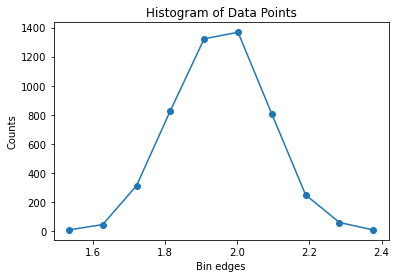

In [4]:
# Plot the histogram
plt.plot(bin_edges[:-1], counts, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Bin edges')
plt.ylabel('Counts')
plt.title('Histogram of Data Points')

# Show the plot
plt.show()

#### Binning integers
*But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you.*

*Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by λ=10*
* Find the maximum and minimum value of your 5000 random numbers.

In [5]:
# Set the parameter for Poisson distribution
lambda_ = 10
num_points = 5000

# Generate data points
poisson_data = np.random.poisson(lambda_, num_points)

# Find the maximum and minimum values
max_value = np.max(poisson_data)
min_value = np.min(poisson_data)

# Print the results
print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: 23
Minimum value: 1


*Instead of simply specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector.*

*Create a vector v that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting numpy.histogram's bin parameter as bin = v*
* What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [6]:
# Create the bin edges vector
bin_edges = np.arange(min_value, max_value + 2)  # +2 to include max_value in the last bin

# Bin the data using the custom bin edges
counts, _ = np.histogram(poisson_data, bins=bin_edges)

# Print the sum of bin counts
print("Sum over bin counts:", np.sum(counts))

Sum over bin counts: 5000


* The first element of bin_edges is equal to the minimum value from the Poisson distribution.
* The last element of bin_edges is one more than the maximum value from the Poisson distribution. This extra value ensures that the maximum value is included in the last bin.

*Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution*

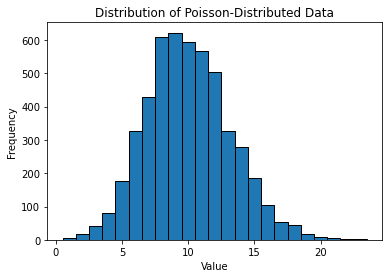

In [7]:
# Plot the histogram as a bar chart
plt.bar(bin_edges[:-1], counts, width=1.0, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Poisson-Distributed Data')

# Show the plot
plt.show()


bin_edges[:-1]: The x-values for the bars. Each bar is centered on each integer value.

#### Binning and plotting degree distributions.
*Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.*

*First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000, but how do you find p?*

*Hint: The parameter λ in the Poisson distribution corresponds to the average degree, so you have to find a p that results in an average degree, k=10*
* *And you know that ⟨k⟩=p(N−1), which will give you p*



We then know that p = k/(N-1), then p = 10/(5000-1) = 0.002

*Now, use networkx to create the graph and extract the degree distribution.*
* *Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.*

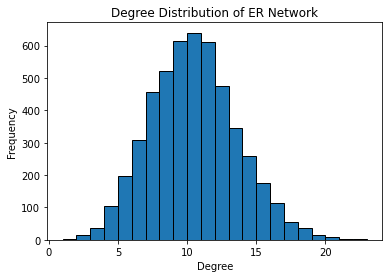

In [9]:
# Parameters
N = 5000
p = 10 / (N - 1)

# Generate the ER network
G = nx.erdos_renyi_graph(N, p)

# Get the degree sequence
degree_sequence = [degree for _, degree in G.degree()]

# Plot the degree distribution
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of ER Network')
plt.show()